
ZGI.TO

We have the file /Users/eartigau/bydoux_data/quotes/ZGI.TO.fits
0.018094827893946785
ZGI.TO 0.1252 0.1259

ZCN.TO

We have the file /Users/eartigau/bydoux_data/quotes/ZCN.TO.fits
0.025708941953780595
ZCN.TO 0.1008 0.0714

STPL.TO

We have the file /Users/eartigau/bydoux_data/quotes/STPL.TO.fits
0.018082776841765735
STPL.TO 0.0729 0.0439

ZIU.TO

We have the file /Users/eartigau/bydoux_data/quotes/ZIU.TO.fits
0.018078432309266645
ZIU.TO 0.2265 0.0289

COMM.TO

We have the file /Users/eartigau/bydoux_data/quotes/COMM.TO.fits
0.01806855168979382
COMM.TO 0.1080 0.1040

ZDM.TO

We have the file /Users/eartigau/bydoux_data/quotes/ZDM.TO.fits
0.01804789691232145
ZDM.TO 0.1044 0.0812

DISC.TO

We have the file /Users/eartigau/bydoux_data/quotes/DISC.TO.fits
0.018034988555882592
DISC.TO 0.1068 0.0993

ZEA.TO

We have the file /Users/eartigau/bydoux_data/quotes/ZEA.TO.fits
0.6865649263781961
ZEA.TO 0.0848 0.0652

ZEO.TO

We have the file /Users/eartigau/bydoux_data/quotes/ZEO.TO.fits
0.

/var/folders/cy/vv8rw3d12f31t1wpxpbdgmtm0000gp/T/ipykernel_33029/1207100922.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


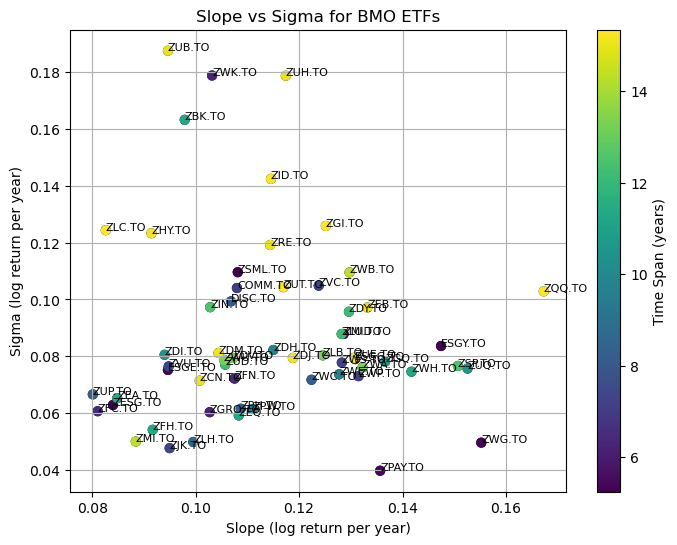

In [5]:
import numpy as np
from scipy.optimize import minimize
import bydoux_tools as bt
from astropy.time import Time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

tickers = [
    'ZGI', 'ZCN', 'STPL', 'ZIU', 'COMM', 'ZDM', 'DISC', 'ZEA', 'ZEO', 'ZEM',
    'ZGD', 'ZUE', 'ZJG', 'ZSP', 'ZEAT', 'ZSP.U', 'ZMT', 'ZDJ', 'ZQQ', 'ESGA',
    'ZNQ', 'ESGY', 'ZNQ.U', 'ESGE', 'ZMID.F', 'ESGG', 'ZMID', 'ZGRN', 'ZMID.U', 'ZCLN',
    'ZSML.F', 'ESGB', 'ZSML', 'ESGF', 'ZSML.U', 'ZJPN', 'ZJPN.F', 'ZCS', 'ZID', 'ZCS.L',
    'ZCH', 'ZCM', 'ZLC', 'ZLB', 'ZPS', 'ZLH', 'ZPS.L', 'ZLU', 'ZFS', 'ZLU.U',
    'ZFS.L', 'ZLD', 'ZMP', 'ZLI', 'ZPL', 'ZLE', 'ZFM', 'ZUQ.F', 'ZFL', 'ZUQ',
    'ZUQ.U', 'ZAG', 'ZGQ', 'ZSB', 'ZEQ', 'ZCB', 'ZDV', 'ZDB', 'ZUD', 'ZSDB',
    'ZDY', 'ZCDB', 'ZDY.U', 'ZMMK', 'ZDH', 'ZST', 'ZDI', 'ZST.L', 'ZVC', 'ZMBS',
    'ZVU', 'ZGB', 'ZRR', 'ZOCT', 'ZBI', 'ZJUL', 'ZBBB', 'ZAPR', 'ZQB', 'ZJAN',
    'ZUAG', 'ZWC', 'ZUAG.F', 'ZWS', 'ZUAG.U', 'ZWH', 'ZSU', 'ZWH.U', 'ZMU', 'ZWA',
    'ZIC', 'ZWE', 'ZIC.U', 'ZWP', 'ZUCM', 'ZWG', 'ZUCM.U', 'ZWB', 'ZUS.U', 'ZWB.U',
    'ZUS.V', 'ZWK', 'ZTS', 'ZWU', 'ZTS.U', 'ZWHC', 'ZTM', 'ZWEN', 'ZTM.U', 'ZWT',
    'ZTL.F', 'ZWQT', 'ZTL', 'ZPAY.F', 'ZTL.U', 'ZPAY', 'ZTIP', 'ZPAY.U', 'ZTIP.U', 'ZPH',
    'ZTIP.F', 'ZPW', 'ZJK', 'ZPW.U', 'ZHY', 'ZJK.U', 'ZEB', 'ZFH', 'ZUT', 'ZEF',
    'ZRE', 'ZIN', 'ZPR', 'ZUB', 'ZPR.U', 'ZBK', 'ZHP', 'ZUH', 'ZUP', 'ZHU',
    'ZUP.U', 'PAGE', 'Ticker', 'Date', 'ASSET', 'ZCON', 'ZBAL', 'ZGRO', 'ZEQT', 'ZESG',
    'ZBAL.T', 'ZGRO.T', 'ZMI', 'ACTIVE', 'ZLSC', 'ZLSU', 'ZZZD', 'ZACE', 'ARKK', 'ARKG',
    'ARKW', 'BGEQ', 'BGHC', 'BGIF', 'BGIN', 'BGDV', 'BGRT', 'GRNI', 'TOWR', 'WOMN',
    'ZGSB', 'ZMSB', 'ZCPB', 'ZFC', 'ZFN', 'ZXLE', 'ZXLU', 'ZXLK', 'ZXLB', 'ZXLP',
    'ZXLY', 'ZXLI', 'ZXLC', 'ZXLV', 'ZXLF', 'ZXLR', 'ZXLE.F', 'ZXLU.F', 'ZXLK.F', 'ZXLB.F',
    'ZXLP.F', 'ZXLY.F', 'ZXLI.F', 'ZXLC.F', 'ZXLV.F', 'ZXLF.F', 'ZXLR.F']
# add .TO to all
tickers = [ticker+'.TO' for ticker in tickers]

tickers = np.array(tickers)

time_spans = np.zeros(len(tickers))
slopes = np.zeros(len(tickers))
sigmas = np.zeros(len(tickers))
q = np.zeros(len(tickers))

for iticker, ticker in enumerate(tickers):
    print(f'\n{ticker}\n')
    # read the data
    tbl = bt.read_quotes(ticker)

    # test if None
    if tbl is None:
        print(f"Failed to read {ticker}")
        continue

    yr =  tbl['mjd']/365
    val = tbl['log_close']

    fit = np.polyfit(yr, val, 1)
    slopes[iticker] = fit[0]
    sigmas[iticker] = np.std(val - (fit[0] * yr + fit[1]))

    print(f"{ticker} {slopes[iticker]:.4f} {sigmas[iticker]:.4f}")

    time_spans[iticker] = (tbl['mjd'][-1] - tbl['mjd'][0])/365

keep = (sigmas !=0)*(time_spans >5)*(slopes > 0.08)*(slopes<0.25)
tickers = tickers[keep]
slopes = slopes[keep]
sigmas = sigmas[keep]
time_spans = time_spans[keep]

q = slopes / sigmas#*np.sqrt(time_spans)
ord = np.argsort(-q)

tickers = tickers[ord]
slopes = slopes[ord]
sigmas = sigmas[ord]
time_spans = time_spans[ord]
q = q[ord]
print('Best 10:')

print('Ticker\tSlope\tSigma\tTime Span\tQ')
for iticker in range(20):
    info = bt.get_info(tickers[iticker])

    print('\n')
    print(info['longName'])
    print(f"{tickers[iticker]} {slopes[iticker]*100:.1f} +- {sigmas[iticker]*100:.1f}%, dt = {time_spans[iticker]:.1f} yr, Q = {q[iticker]:.2f}")



# Normalize the color map to the range of time_spans
norm = mcolors.Normalize(vmin=np.min(time_spans), vmax=np.max(time_spans))
cmap = cm.get_cmap('viridis')

plt.figure(figsize=(8, 6))
# Scatter plot with color based on time_spans
sc = plt.scatter(slopes, sigmas, c=time_spans, cmap=cmap, norm=norm, s=40, edgecolor='k')

# Optionally, highlight those with slope > 0.08
g = (slopes > 0.08)*(slopes<0.25)*(time_spans > 3)
plt.scatter(slopes[g], sigmas[g], c=time_spans[g], cmap=cmap, norm=norm, s=40)

# Annotate each point with the ticker
for iticker in range(len(tickers)):
    plt.text(slopes[iticker], sigmas[iticker], tickers[iticker], fontsize=8)

plt.xlabel('Slope (log return per year)')
plt.ylabel('Sigma (log return per year)')
plt.grid()
plt.title('Slope vs Sigma for BMO ETFs')

# Add colorbar for timespan
cbar = plt.colorbar(sc)
cbar.set_label('Time Span (years)')

plt.show()